In [241]:
import pandas as pd
import numpy as np

from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 1.1 Среднее, медиана и мода

In [ ]:
# Создадим датафрейм с данными о росте, весе и скоре игроков
df = pd.DataFrame({'player_number': [10, 8, 12, 22, 36, 7, 1, 20, 9, 4, 14],
                    'height': [168, 176, 178, 191, 185, 183, 185, 179, 169, 183, 167],
                    'weight': [76, 77, 79, 81, 82, 79, 74, 84, 73, 71, 68],
                    'score': [95, 86, 94, 96, 95, 95, 89, 83, 99, 78, 82]})
df

In [ ]:
# Среднее
mean_height = df.height.mean()
# Медиана
median_height = df.height.median()
# Мода
mode_height = df.height.mode()
print(mean_height)
print(median_height)
print(mode_height)

In [ ]:
mean = df.mean()
print(mean)

In [ ]:
weight = pd.Series([76, 77, 79, 81, 82, 79, 74, 84, 73, 71, 68])
weight.mean()

In [246]:
import numpy as np
from scipy import stats

In [ ]:
mean_height = np.mean(df['height'])
median_height = np.median(df['height'])
mode_height = stats.mode(df['height'])
print(mean_height)
print(median_height)
print(mode_height)

In [ ]:
def solution(A): # A - некий датафрейм
    x = round(A['score'].median(), 1)
    return float(x)

print(solution(df))

In [ ]:
# Рассчитайте среднее значение веса игроков (weight), 
# которые набрали больше 90 баллов за сезон (score). 
# Выведите полученное значение типа float на экран, округлив до 5 знаков после запятой.
def solution(A): # A - некий датафрейм
    x = A.query('score > 90').weight.mean().round(5)
    return x

print(solution(df))

In [ ]:
x = df.weight[df.score>90].mean().round(5)
x

In [ ]:
# Рассчитайте среднее значение роста игроков (height), 
# которые весят больше 80 кг и за сезон набрали не меньше 95 баллов (score). 
# Выведите полученное значение типа float на экран, округлив до 1 знака после запятой.
x = df['height'][(df['weight'] > 80) & (df['score'] >= 95)].mean().round(1)
print(x)
x = df['height'][df['weight'] > 80][df['score'] >= 95].mean().round(1)
print(x)
x = df.query('weight > 80 & score >= 95')['height'].mean().round(1)
print(x)

In [ ]:
def solution(A): # A - некий датафрейм
    x = round(A.score.mode())
    return x

print(solution(df))

# 1.2 Дисперсия и стандартное отклонение

In [ ]:
df = pd.DataFrame({'Company': ['Occidental Petroleum',
'Exxon Mobil Corporation', 'Chevron Corporation',
'Ovintiv Inc.', 'Murphy Oil',
'Apache Corp', 'Continental Resources',
'PDC Energy', 'Phillips 99', 'Devon Energy Corp',
'Canadian Natural Resources', 'Cenovus Energy', 'Enbridge', 'Husky Energy',
'Imperial Oil', 'Irving Oil', 'Pembina Pipeline', 'Suncor Energy'],
 'ROE': [7.35, 4.33, 3.37, 8.3, 3.97, 9.88, 9.52, 7.48, 4.76, 8.95, 9.10, 4.21,
6.12, 7.91, 8.49, 8.72, 6.52, 4.75]})
df

In [ ]:
Var = df['ROE'].var()
sd = df['ROE'].std()
Var_smeshennaya = df['ROE'].var(ddof=0)
sd_smeshennaya = df['ROE'].std(ddof=0)
sd_smeshennaya = np.var(df['ROE'])
Var, sd, Var_smeshennaya, sd_smeshennaya

In [ ]:
Var = np.var(df['ROE'], ddof=1)
sd = np.std(df['ROE'], ddof=1)
Var_smeshennaya = np.var(df['ROE'])
sd_smeshennaya = np.var(df['ROE'])
Var, sd, Var_smeshennaya, sd_smeshennaya

In [ ]:
# Рассчитайте смещенную оценку выборочной дисперсии рентабельности капитала (ROE) нефтегазовых компаний, 
# значения которых находятся в интервале от 4 до 8 процентов годовых включительно. 
# Выведите полученное значение типа float на экран, округлив до 5 знаков после запятой.
var_smesh = np.var(df['ROE'][(4 <= df['ROE']) & (df['ROE'] <= 8)])
var_smesh

In [ ]:
# Рассчитайте несмещенную оценку стандартного отклонения рентабельности капитала (ROE) компаний из выборки df 
# за исключением компании Apache Corp. 
# Выведите полученное значение типа float на экран, округлив до 5 знаков после запятой.
var = round(df['ROE'][~(df['Company'] == 'Apache Corp')].std(), 5)
var

# 1.3 Ковариация и корреляция

In [258]:
# создаем серии данных
NIM = pd.Series([7.6, 7.9, 8.3, 7.2, 6.9, 7.9, 7.4, 7.8, 5.9, 7.1, 6.8])
rate = pd.Series([10, 12, 12, 8, 8, 7.5, 7.5, 7.5, 6.5, 7, 7])

In [ ]:
# рассчитываем значение корреляции Пирсона между двумя сериями данных NIM и rate
corr = stats.pearsonr(NIM,rate)
print(corr)
print(corr.statistic)
print(corr.pvalue)

In [ ]:
df = pd.DataFrame({'NIM': [7.6, 7.9, 8.3, 7.2, 6.9, 7.9, 7.4, 7.8, 5.9, 7.1, 6.8],
 'rate': [10, 12, 12, 8, 8, 7.5, 7.5, 7.5, 6.5, 7, 7],
 'GDP_growth': [2.5, 1.8, 3.1, 1.9, 2.4, 2.8, 1.0, 3.2, 2.1, 2.2, 0.5]})
df

In [ ]:
corr_matrix = df.corr().round(3)
print(corr_matrix)

In [262]:
# Рассчитайте значение корреляции Пирсона между двумя наборами данных А и B. 
# Выведите полученное значение типа float на экран, округлив до 5 знаков после запятой.
A = np.array([43, 32, 42, 48, 58, 57.5, 47.5, 37.5, 56.5, 67, 47.3])
B = np.array([12.5, 11.8, 13.1, 11.9, 12.4, 17.8, 13.3, 13.2, 12.1, 12.2, 8.5])

In [ ]:
corr = stats.pearsonr(A, B)[0].round(5)
corr

# 1.4 Box Plot & квартили, квантили, перцентили

In [ ]:
df = pd.DataFrame({'ROE': [7.4, 7.8, 5.9, 7.1, 6.8, 7.6, 7.9, 8.3, 7.2, 6.9, 7.9],
 'COF': [6.3, 4.2, 6.2, 8.1, 8.4, 7.5, 6.5, 7.8, 6.9, 7.1, 7.2],
 'rating': ['AAA', 'BB+', 'BB+', 'AAA', 'BBB-', 'AA', 'AAA', 'AAA', 'BBB-', 'AAA', 'BB+']})
df

In [ ]:
# список квартилей
Q = [0.25, 0.5, 0.75]
print(df['ROE'].quantile(0.37))
print()
print(df['ROE'].quantile(Q))

In [ ]:
# Рассчитайте значение 0.25-квантиля выборки значений стоимости фондирования (COF) 
# для банков с кредитным рейтингом AAA (rating). 
# Выведите полученное значение типа float на экран, округлив до 1 знака после запятой.
x = df.groupby('rating')['COF'].quantile(0.25)['AAA'].round(1)
print(x)
x = df[df.rating == 'AAA']['COF'].quantile(0.25).round(1)
print(x)

In [ ]:
# Рассчитайте значение 0.25-квантиля и 0.5-квантиля выборки значений стоимости фондирования (COF) 
# для банков с кредитным рейтингом ВВ+ (rating). 
# Выведите максимальное из получившихся значений типа float на экран, округлив до 1 знака после запятой.
x = df[df.rating == 'BB+']['COF'].quantile([0.25, 0.5]).max()
print(x)
x = max(df.groupby('rating')['COF'].quantile(0.25)['BB+'], df.groupby('rating')['COF'].quantile()['BB+']).round(1)
print(x)
x = round(df.groupby('rating')['COF'].quantile([0.25, 0.5])['BB+'].max(), 1)
print(x)

In [ ]:
# Рассчитайте значение 53-го перцентиля выборки значений стоимости фондирования (COF) для всех банков. 
# Выведите полученное значение типа float на экран, округлив до 3 знаков после запятой.
df['COF'].quantile(0.53).round(3)

In [ ]:
bp = plt.boxplot(df['COF'],
                     vert=False,  # расположение бокса (True по умолчанию)
                     patch_artist=True,  # наполнение бокса цветом (False по умолчанию)
                     showmeans=True, # показывать среднее (зеленый треугольник) (False по умолчанию)
                     showfliers=True, # показывать выбросы (True по умолчанию)
                     labels=['COF'])  # надписи
plt.show()

In [ ]:
bp = plt.boxplot([df['COF'], df['ROE']],
                     vert=True,  # расположение бокса (True по умолчанию)
                     patch_artist=False,  # наполнение бокса цветом (False по умолчанию)
                     showmeans=True, # показывать среднее (False по умолчанию)
                     showfliers=False, # показывать выбросы (True по умолчанию)
                     labels=['COF', 'ROE'])  # надписи
plt.show()

# 1.5 Функции CDF, PDF, PPF, SF, ISF

In [ ]:
def function1(x):
    return [el if 0 <= el <= 5 else 0 for el in x]

def function1_INT(x):
    return [
        0.5 * el ** 2 if 0 <= el <= 5 else (0 if el < 0 else 12.5)
        for el in x
    ]

def function3(x):
    return [
        (el if el <= 2.5 else 5 - el) if 0 <= el <= 5 else 0
        for el in x
    ]

def function3_INT(x):
    return [
        ((1/2)*el**2 if el <= 2.5 else 5*el - (1/2)*el**2 ) if 0 <= el <= 5 else (0 if el < 0 else 12.5)
        for el in x
    ]

def function4(x):
    return [
        (2.5 if el <= 2.5 else 5 ) if 0 <= el <= 5 else 0
        for el in x
    ]

def function4_INT(x):
    return [
        (2.5*el if el <= 2.5 else 5 *el) if 0 <= el <= 5 else (0 if el < 0 else 25)
        for el in x
    ]


x = np.arange(-10, 10.01, 0.01)

fig, axs = plt.subplots(3, 2, figsize=(5, 10))

axs[0, 0].plot(x, function1(x))
axs[0, 0].set_title('Function 1 PDF')

axs[0, 1].plot(x, function1_INT(x))
axs[0, 1].set_title('Function 1 CDF')

axs[1, 0].plot(x, function3(x))
axs[1, 0].set_title('Function 2 PDF')

axs[1, 1].plot(x, function3_INT(x))
axs[1, 1].set_title('Function 2 CDF')

axs[2, 0].plot(x, function4(x))
axs[2, 0].set_title('Function 4 PDF')

axs[2, 1].plot(x, function4_INT(x))
axs[2, 1].set_title('Function 4 CDF')

plt.tight_layout()
plt.show()

# 2.1 CLT и нормальное распределение

In [272]:
data = stats.norm(0,3) # Создаем нормальное распределение со средним 0 и стандартным отклонением 3

x = np.linspace(-10, 10, 1000) # Создаем ось Х из 1000 значений в интервале от -10 до 10
# x = np.arange(-10,10,0.02) # Альтернативный способ создания оси Х из 1000 значений в интервале от -10 до 10 с заданием шага(0.02)

In [ ]:
# Кумулятивная функция распределения
CDF = data.cdf(x) # Создаем функкцию CDF от значений в интервале х
plt.plot(x, CDF) # Строим график СDF
plt.show()

In [ ]:
# Функция плотности вероятности
PDF = data.pdf(x) # Создаем функкцию PDF от значений в интервале х
plt.plot(x, PDF) # Строим график PDF
plt.show()

In [ ]:
# Функция выживаемости
SF = data.sf(x) # Создаем функкцию SF от значений в интервале х
plt.plot(x, SF) # Строим график SF
plt.show()

In [ ]:
# Квантиль-функция
PPF = data.ppf(x) # Создаем функкцию PPF от значений в интервале х
plt.plot(x, PPF) # Строим график PPF
plt.show()

In [ ]:
# Обратная функция SF
ISF = data.isf(x) # Создаем функкцию ISF от значений в интервале х
plt.plot(x, ISF) # Строим график ISF
plt.show()

In [ ]:
# Рассчитайте значение кумулятивной функции распределения в точке х = 46 для нормального распределения 
# со средним 50 и стандартным отклонением 2. 
# Выведите полученное значение типа float на экран, округлив до 5 знаков после запятой.
mean = 50
sd = 2
x = 46
x_cdf = stats.norm.cdf(x, mean, sd)
x_cdf.round(5)


In [ ]:
# Рассчитайте значение функции выживаемости в точке х = 34 для нормального распределения 
# со средним 30 и стандартным отклонением 4. 
# Выведите полученное значение типа float на экран, округлив до 5 знаков после запятой.
mean = 30
sd = 4
x = 34
x_sf = stats.norm.sf(x, mean, sd)
# x_sf = 1 - stats.norm.cdf(x, mean, sd)
x_sf.round(5)

In [ ]:
# Рассчитайте значение функции плотности вероятности распределения в точке х = 12.11 для нормального распределения 
# со средним 0 и стандартным отклонением 4.54. 
# Выведите полученное значение типа float на экран, округлив до 5 знаков после запятой.
data = stats.norm(0, 4.54)
x_pdf = data.pdf(12.11)
x_pdf.round(5)

In [ ]:
# Рассчитайте, чему равна вероятность попадания случайной величины в интервал от -1 до 2 
# для нормального распределения со средним 0 и стандартным отклонением 1.95. 
# Выведите полученное значение типа float на экран, округлив до 5 знаков после запятой.
data = stats.norm(0, 1.95)
x_probability = data.cdf(2) - data.cdf(-1)
x_probability.round(5)

In [ ]:
# Микрокредитные организации имеют значение доли проблемных кредитов (NPL) в кредитном портфеле 
# в среднем на уровне 7,45% по сектору. Стандартное отклонение равно 1.36%. 
# Считаем, что распределение является нормальным. Чему равна вероятность того, 
# что случайно выбранная микрокредитная организация будет иметь долю NPL в портфеле, не превышающую 8,99%? 
# Выведите полученное значение типа float на экран, округлив до 5 знаков после запятой.
data = stats.norm(7.45, 1.36)
x_probability = data.cdf(8.99)
x_probability.round(5)

In [ ]:
# В городе 876 832 зданий. Стандартное отклонение значений высоты зданий равна 5,34 метра. 
# Считаем, что распределение является нормальным. Чему равно среднее значение распределений высот зданий, 
# если 95% всех зданий имеют высоту больше 48,5 метра. 
# Выведите полученное значение типа float на экран, округлив до 2 знаков после запятой.
n = 876832
sd = 5.34
x = 48.5
a = 0.95
z_value = stats.norm.ppf(1-a)
# z_value = (x - mean) / sd
mean = x - z_value * sd
mean.round(2)

In [ ]:
mu = mean
sigma = 5.34

x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
y = stats.norm.pdf(x, mu, sigma)

quantile_5 = stats.norm.ppf(0.05, mu, sigma)

plt.figure(figsize=(10, 6))
sns.lineplot(x=x, y=y, color='blue')
plt.fill_between(x, y, where=(x <= quantile_5), color='red', alpha=0.5)

plt.title('Нормальное распределение высот зданий')
plt.xlabel('Высота зданий (метры)')
plt.ylabel('Плотность вероятности')
plt.axvline(quantile_5, color='red', linestyle='--')
plt.text(quantile_5, max(y)*0.5, '5% квантиль\n48.5 метра', horizontalalignment='right', color='red')

plt.show();

In [ ]:
# В США средний уровень годового дохода работника с высшим образованием составляет 78,97 тысяч долларов 
# со стандартным отклонением 13,23 тысяч долларов, а работника без высшего образования - 46,65 тысяч долларов 
# со стандартным отклонением 8,11 тысяч долларов. Какова вероятность того, что случайно выбранный работник 
# с высшим образованием будет иметь больший годовой доход, чем случайно выбранный работник без высшего образования? 
# Считаем, что распределения являются нормальными. Выведите полученное значение типа float на экран, округлив до 5 знаков после запятой.
mean_he = 78.97
sd_he = 13.23

mean_withount_he = 46.65
sd_without_he = 8.11

mean = mean_he - mean_withount_he
sd = (sd_he ** 2 + sd_without_he ** 2) ** 0.5
salary_diff_dist = stats.norm(mean, sd)

p = salary_diff_dist.sf(0)
p.round(5)

# 2.2 Тест Колмогорова-Смирнова

In [286]:
from numpy.random import seed
from numpy.random import lognormal, randn
from scipy.stats import kstest, ks_2samp
from statsmodels.stats.diagnostic import lilliefors

In [ ]:
# инициализируем генератор псевдослучайных чисел
seed(0)

# создаем 1000 значений, имеющих логнормальное распределение со средним значением 0 и стандартным отклонением 2
data = lognormal(0, 2, 1000)

# запускаем одновыборочный тест Колмогорова-Смирнова на соответствие нашего распределения (data) нормальному распределению (norm)
print(kstest(data, 'norm'))
# Поскольку получившееся значение p-value < 0.01, мы можем отвергнуть нулевую гипотезу о нормальности данных.

In [ ]:
# инициализируем генератор псевдослучайных чисел
seed(0)

# создаем 1000 значений, имеющих стандартное нормальное распределение
standard_normal = randn(1000)

# создаем 100 значений, имеющих логнормальное распределение со средним значением 0 и стандартным отклонением 2
log_normal = lognormal(0, 2, 1000)

# запускаем двухвыборочный тест Колмогорова-Смирнова
print(ks_2samp(standard_normal, log_normal))
# Поскольку получившееся значение p-value < 0.01, мы можем отвергнуть нулевую гипотезу о том, что две выборки происходят из одного и того же распределения.

In [ ]:
# инициализируем генератор псевдослучайных чисел
seed(0)

# создаем 1000 значений, имеющих логнормальное распределение со средним значением 0 и стандартным отклонением 2
data = lognormal(0, 2, 1000)

# запускаем одновыборочный тест Колмогорова-Смирнова c поправкой Лиллиефорса
print(lilliefors(data))
# Поскольку получившееся значение p-value (0.00099999...) < 0.01, мы можем отвергнуть нулевую гипотезу о нормальности данных.

In [ ]:
# Проверьте на нормальность выборку из 1254 значений ежедневных изменения индекса S&P 500, проведя тест Колмогорова-Смирнова. 
# Выведите полученное значение статистики (statistic) Колмогорова-Смирнова на экран, округлив до 5 знаков после запятой.
df = pd.read_csv('data\SP_500_returns.csv', sep=';')
df

In [ ]:
statistic_ks = stats.kstest(df['Return_SP_500'], 'norm')
statistic_ks.statistic.round(5), statistic_ks.pvalue
# Отвергаем нулевую гипотезу о соответствии нормальному распределению

# 2.3 Тест Шапиро-Уилка

In [292]:
from numpy.random import poisson
from scipy.stats import shapiro

In [ ]:
# инициализируем генератор псевдослучайных чисел
seed(0)

# создаем 100 значений, имеющих распределение Пуассона с лямбдой, равной 5
data = poisson(5, 100)

# запускаем тест Шапиро-Уилка на соответствие нашего распределения (data) нормальному распределению
print(shapiro(data))
# Поскольку получившееся значение p-value < 0.01, мы можем отвергнуть нулевую гипотезу о нормальности данных. 

In [ ]:
# Проверьте на нормальность выборку из 100 значений, распределенных стандартно нормально 
# (генератор псевдослучайных чисел seed(0)). Используйте тест Шапиро-Уилка. 
# Выведите полученное значение p-value на экран.
seed(0)
data = np.random.normal(0, 1, 100)
shapiro(data).pvalue

In [ ]:
# Проверьте на нормальность выборку из 10 000 значений, имеющих логнормальное распределение 
# со средним значением 1 и стандартным отклонением 13.22 (генератор псевдослучайных чисел seed(0)). 
# Используйте тест Шапиро-Уилка. 
# Выведите полученное значение статистики Шапиро-Уилка (statistic) на экран, округлив до 5 знаков после запятой.
seed(0)
data = np.random.lognormal(1, 13.22, 10000)
statistic_shapiro  = shapiro(data).statistic
round(statistic_shapiro, 5)

# 2.4 QQ plot - графический анализ

In [296]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from numpy.random import lognormal, randn

In [ ]:
np.random.seed(0)
# Создаем выборку из 1000 значений, имеющих стандартное нормальное распределение
data = randn(1000)

# Строим QQ plot с reference line в виде прямой линии под 45 градусов
fig = sm.qqplot(data, line='45')
plt.show();

In [ ]:
np.random.seed(0)
# Создаем выборку из 1000 значений, имеющих логнормальное распределение
data = lognormal(0, 1, 1000)

# Строим QQ plot с reference line в виде прямой линии под 45 градусов
fig = sm.qqplot(data, line='45')
plt.show();

# 3.1 Одновыборочный t-тест

In [299]:
from scipy.stats import ttest_1samp

In [300]:
sample = [7, 8, 9, 13, 10, 9, 9, 10, 9, 11, 12, 8, 9, 11, 10, 9, 10]

In [ ]:
ttest_1samp(sample, 9.71)
# pvalue сильно больше alpha = 0.05, следовательно оснований недостаточно, чтобы оттвергнуть нулевую гипотезу

In [ ]:
# Проведите одновыборочный t-тест о равенстве математического ожидания генеральной совокупности значений веса мужчин 
# на острове Джерси значению 86.44. У нас есть данные по выборке, состоящей из 40 мужчин острова Джерси. 
# Выборочное среднее равно 83.55, стандартное отклонение 7.74. 
# Выведите полученное значение p-value (pvalue) на экран, округлив до 5 знаков после запятой.
weight = np.array([100, 82, 92, 88, 78, 85, 89, 79, 61, 87, 89, 87, 89, 86, 79, 78, 78, 85, 89, 79, 61, 87, 92, 88, 78, 85, 79, 78, 78, 85, 101, 87, 89, 86, 79, 78, 78, 85, 89, 79])
mu = 86.44
n = 40
m = 83.55
sd = 7.74
h0_pvalue = ttest_1samp(weight, mu).pvalue
h0_pvalue.round(5)

In [ ]:
n_weigth = len(weight)
m_weight = np.mean(weight)
sd_weight = np.std(weight, ddof=1)
df = n -1
m_population = 86.44

tt_statisctic = (m_weight - m_population) / (sd_weight / n**0.5)

pvalue = 2 * (1 - stats.t.cdf(abs(tt_statisctic), df))
pvalue.round(5)

In [ ]:
df = pd.read_csv('data\SP_500_returns.csv', sep=';')
df

In [ ]:
# Проведите одновыборочный t-тест о равенстве математического ожидания значений изменения индекса S&P 500 значению 0.00087. 
# Известная нам выборка состоит из 1254 значений изменений индекса S&P 500. 
# Выведите полученное значение t-статистики (statistic) на экран, округлив до 5 знаков после запятой.

def solution(A): # A - некий датафрейм
    pass
    x = ttest_1samp(A['Return_SP_500'], 0.00087).statistic
    return x.round(5)

print(solution(df))

# 3.2 Двухвыборочный t-тест & тест Уэлча

In [306]:
from scipy.stats import ttest_ind
from scipy.stats import ttest_ind_from_stats
import scipy.stats as sts

In [ ]:
sample_x = [7, 8, 9, 13, 10, 9, 9, 10, 9, 11, 12, 8, 9, 11, 10, 9, 10]
sample_y = [9, 12, 11, 11, 12, 8, 7, 9, 8, 10, 11, 10, 9, 10, 11, 9, 8]
print(np.var(sample_x))
print(np.var(sample_y))

In [ ]:
ttest_ind(sample_x, sample_y, equal_var=True)

In [ ]:
ttest_ind_from_stats(65,7,1000,72,9,1000)

In [ ]:
df = pd.read_csv('data/bank_sector.csv')
df.head()

In [ ]:
# Есть две выборки значений среднегодовой доходности банковского сектора в США и Китае с 1971 по 2019 год. 
# Оцените гомогенность дисперсий. 
# Выведите отношение большей выборочной дисперсии к меньшей выборочной дисперсии на экран, округлив полученное значение до 5 знаков после запятой.
china_sd = df['China'].var()
us_sd = df['US'].var()
# china_sd = np.var(df['China'], ddof=1)
# us_sd = np.var(df['US'], ddof=1)
x = max(china_sd, us_sd) / min(china_sd, us_sd)
round(x, 5)

In [ ]:
# Есть две выборки значений среднегодовой доходности банковского сектора в США и Китае с 1971 по 2019 год. 
# Проведите необходимый t-тест на проверку равенства средних. 
# Выведите значение p-value на экран, округлив полученное значение до 5 знаков после запятой.
x = ttest_ind(df['US'], df['China']).pvalue
round(x, 5)

In [ ]:
df = pd.read_csv('data/research.csv')
df.head()

In [ ]:
# Университет провел исследование, чтобы выяснить, правда ли, что громкая музыка в наушниках у студентов во время экзамена 
# негативно сказывается на их результатах. Для этого во время финальных экзаменов случайным образом были отобраны 250 студентов, 
# которых случайным образом разделили на две равные выборки: тестовую и контрольную. 
# Студентам из тестовой выборки во время экзамена давали наушники и включали Led Zeppelin на полную громкость. 
# Студентам из контрольной выборки предоставили тихую аудиторию и дали прохладной водички. 
# Итоговые результаты студентов из двух выборок записаны в датафрейм (0-плохо, 50-отлично). 
# Проведите нужные статистические тесты, не забудьте проверить распределения на нормальность, а их дисперсии на гомогенность. 
# Определите на основе полученных результатов теста, можно ли отвергнуть нулевую гипотезу о том, что громкая музыка никак не мешает студентам сдавать экзамены. 

# Выведите значение p-value на экран, округлив полученное значение до 5 знаков после запятой.

test_kstest = sts.kstest(df['test'], 'norm').pvalue
control_kstest = sts.kstest(df['control'], 'norm').pvalue
print(test_kstest, control_kstest)
gomogen = sts.ttest_ind(df['test'], df['control']).pvalue
print(round(gomogen, 5))


In [ ]:
test_sd = df['test'].var()
control_sd = df['control'].var()
# china_sd = np.var(df['China'], ddof=1)
# us_sd = np.var(df['US'], ddof=1)
x = max(test_sd, control_sd) / min(test_sd, control_sd)
x

In [ ]:
# Проверяем нормальность распределения с помощью теста Шапиро-Уилка.
shapiro_test_test = sts.shapiro(df['test']).pvalue
shapiro_test_control = sts.shapiro(df['control']).pvalue

print(shapiro_test_test, shapiro_test_control)

# Проверяем гомогенность дисперсий с помощью теста Левена.
levene_test = sts.levene(df['test'], df['control'])

# Так как оба теста Шапиро-Уилка и тест Левена дают p-value больше 0.05,
# мы можем предположить, что данные нормально распределены и дисперсии гомогенны.
# Поэтому мы можем использовать двухвыборочный t-тест для сравнения средних значений двух групп.
t_test = sts.ttest_ind(df['test'], df['control'])

# Извлекаем p-value и округляем его до 5 знаков после запятой.
print(round(t_test[1], 5))

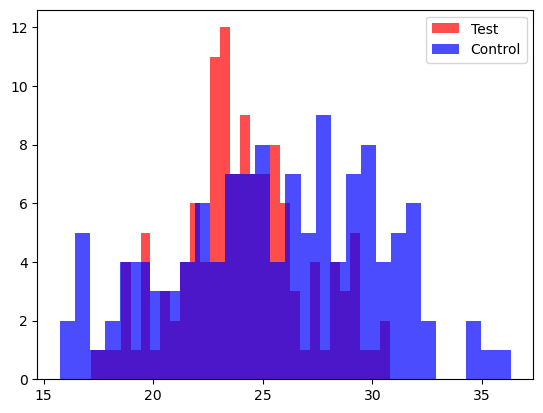

In [317]:
plt.hist(df.test,30, color='r', alpha=0.7, label='Test')
plt.hist(df.control,30, color='b', alpha=0.7, label='Control')
plt.legend()
plt.show();

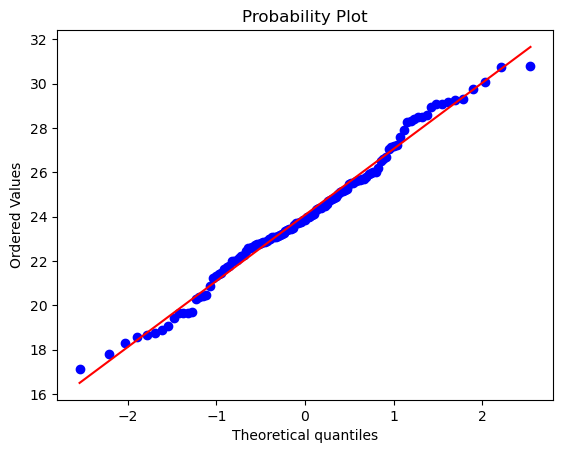

In [318]:
sts.probplot(df.test, dist='norm', plot=plt)
plt.show();

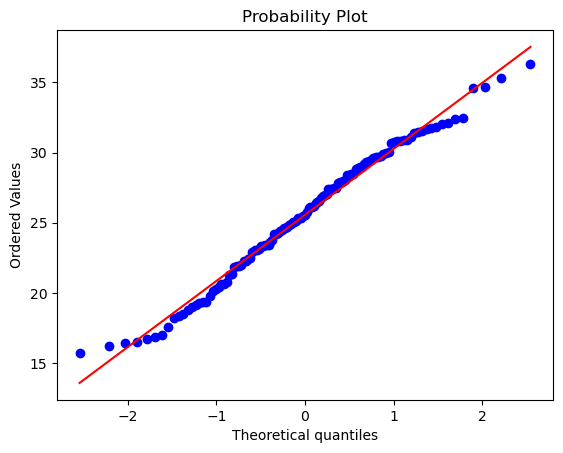

In [319]:
sts.probplot(df.control, dist='norm', plot=plt)
plt.show();

# Конспект по материалу

## Среднее, медиана, мода:

In [320]:
# import pandas as pd

# Среднее
mean = df['столбец'].mean()  # на выходе число

# Медиана
median = df['столбец'].median()  # на выходе число

# Мода
mode = df['столбец'].mode()  # на выходе серия Pandas со значениями мод


# import numpy as np
# from scipy import stats

# Среднее
mean = np.mean(df['столбец'])

# Медиана
median = np.median(df['столбец'])

# Мода
mode = stats.mode(df['столбец'])

KeyError: 'столбец'

## Дисперсия, стандартное отклонение:

In [ ]:
# import pandas as pd

# дисперсия (по умолчанию несмещенная оценка)
var = df['столбец'].var()
# дисперсия (смещенная оценка)
var = df['столбец'].var(ddof=0)


# стандартное отклонение
sd = df['столбец'].std()
# дисперсия (смещенная оценка)
var = df['столбец'].std(ddof=0)

## Ковариация, корреляция:

In [ ]:
# from scipy import stats

# создаем серии данных
A = pd.Series([7.6, 7.9, 8.3, 7.2, 6.9, 7.9, 7.4, 7.8, 5.9, 7.1, 6.8])
B = pd.Series([10, 12, 12, 8, 8, 7.5, 7.5, 7.5, 6.5, 7, 7])

# рассчитываем значение корреляции Пирсона между двумя сериями данных A и B
corr = stats.pearsonr(A,B).statistic


# import pandas as pd

df = pd.DataFrame({'стобец_1': [7.6, 7.9, 8.3, 7.2, 6.9, 7.9, 7.4, 7.8, 5.9, 7.1, 6.8],
 'столбец_2': [10, 12, 12, 8, 8, 7.5, 7.5, 7.5, 6.5, 7, 7],
 'столбец_3': [2.5, 1.8, 3.1, 1.9, 2.4, 2.8, 1.0, 3.2, 2.1, 2.2, 0.5]})

# создаем корреляционную матрицу
corr_matrix = df.corr()

## Квантили, квартили, перцентили:

In [ ]:
# список квартилей, которые хотим рассчитать
Q = [0.25, 0.5, 0.75]

# рассчитываем квантили значений в столбец датафрейма
print(df['столбец'].quantile(Q))

## Box Plot:

In [ ]:
# import matplotlib.pyplot as plt

# строим один Box Plot по столбцу датафрейма
bp = plt.boxplot(df['столбец'],
                     vert=True,  # расположение бокса (True по умолчанию)
                     patch_artist=False,  # наполнение бокса цветом (False по умолчанию)
                     showmeans=True, # показывать среднее (зеленый треугольник) (False по умолчанию)
                     showfliers=True, # показывать выбросы (True по умолчанию)
                     labels=['столбец'])  # надписи
plt.show()

# строим несколько Box Plot по столбцам датафрейма
bp = plt.boxplot([df['столбец_1'],df['столбец_2']]) 
plt.show()



# import pandas as pd

# строим несколько Box Plot по столбцам датафрейма, сгруппированным по другому столбцу
df.boxplot(column=['столбец_1','столбец_2'], by='столбец_3', grid= False , color='black')
plt.show()

## Нормальное распределение:

In [ ]:
# import numpy as np
# from scipy import stats

# Создаем нормальное распределение со средним 0 и стандартным отклонением 3
data = stats.norm(0,3)

x = np.linspace(-10, 10, 1000) # Создаем ось Х из 1000 значений в интервале от -10 до 10
# x = np.arange(-10,10,0.02) # Альтернативный способ создания оси Х из 1000 значений в интервале от -10 до 10 с заданием шага(0.02)

CDF = data.cdf(x) # Создаем функкцию CDF от значений в интервале х
plt.plot(x, CDF) # Строим график СDF
plt.show()

PDF = data.pdf(x) # Создаем функкцию PDF от значений в интервале х
plt.plot(x, PDF) # Строим график PDF
plt.show()

SF = data.sf(x) # Создаем функкцию SF от значений в интервале х
plt.plot(x, SF) # Строим график SF
plt.show()

PPF = data.ppf(x) # Создаем функкцию PPF от значений в интервале х
plt.plot(x, PPF) # Строим график PPF
plt.show()

ISF = data.isf(x) # Создаем функкцию ISF от значений в интервале х
plt.plot(x, ISF) # Строим график ISF
plt.show()

## Тест Колмогорова-Смирнова:

In [ ]:
# from numpy.random import seed
# from numpy.random import lognormal, randn
# from scipy.stats import kstest, ks_2samp

# инициализируем генератор псевдослучайных чисел
seed(0)

# создаем 1000 значений, имеющих логнормальное распределение со средним значением 0 и стандартным отклонением 2
data = lognormal(0, 2, 1000)

# создаем 1000 значений, имеющих стандартное нормальное распределение
standard_normal = randn(1000)

# запускаем одновыборочный тест Колмогорова-Смирнова на соответствие нашего распределения (data) нормальному распределению (norm)
print(kstest(data, 'norm'))

# запускаем двухвыборочный тест Колмогорова-Смирнова
print(ks_2samp(standard_normal, log_normal))

## Тест Колмогорова-Смирнова с поправкой Лиллиефорса:

In [ ]:
# from numpy.random import seed
# from numpy.random import lognormal
# from statsmodels.stats.diagnostic import lilliefors

# инициализируем генератор псевдослучайных чисел
seed(0)

# создаем 1000 значений, имеющих логнормальное распределение со средним значением 0 и стандартным отклонением 2
data = lognormal(0, 2, 1000)

# запускаем одновыборочный тест Колмогорова-Смирнова c поправкой Лиллиефорса
print(lilliefors(data))

## Тест Шапиро-Уилка:

In [ ]:
# from numpy.random import seed
# from numpy.random import poisson
# from scipy.stats import shapiro

# инициализируем генератор псевдослучайных чисел
seed(0)

# создаем 100 значений, имеющих распределение Пуассона с лямбдой, равной 5
data = poisson(5, 100)

# запускаем тест Шапиро-Уилка на соответствие нашего распределения (data) нормальному распределению
print(shapiro(data))

## QQ Plot:

In [ ]:
# import statsmodels.api as sm
# import matplotlib.pyplot as plt
# from numpy.random import lognormal, randn

np.random.seed(0)
# Создаем выборку из 1000 значений, имеющих стандартное нормальное распределение
data = randn(1000)

# Строим QQ plot с reference line в виде прямой линии под 45 градусов
fig = sm.qqplot(data, line='45')
plt.show()

## t-тест:

In [ ]:
# from scipy.stats import ttest_1samp, ttest_ind

#создаем выборки
sample_x = [7, 8, 9, 13, 10, 9, 9, 10, 9, 11, 12, 8, 9, 11, 10, 9, 10]
sample_y = [9, 12, 11, 11, 12, 8, 7, 9, 8, 10, 11, 10, 9, 10, 11, 9, 8]

# проводим одновыборочный t-тест на равенство среднего 9.71
print(ttest_1samp(sample_x, 9.71))

​# проводим двухвыборочный t-тест на равенство средних
print(ttest_ind(sample_x, sample_y))

​# в случае отсутствия гомогенности дисперсий (тест Уэлча)
print(ttest_ind(sample_x, sample_y, equal_var=False))